In [5]:
import pandas as pd
import warnings
#warnings.filterwarnings('ignore')

sample_sub = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

pd.set_option('display.max_columns', None)


In [ ]:
train

In [ ]:
train.isnull().sum()

# Baseline CatBoost Model


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from catboost import CatBoostClassifier

target = 'survival_status'
train = train.drop(columns=['first_name','last_name'],axis=1)
new_df = train
new_df
X = new_df.drop(columns=[target])
y = new_df[target]

# Identify categorical columns by dtype
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train CatBoost Classifier
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train, y_train, cat_features=cat_features)

# Predict and evaluate
y_pred = cat_model.predict(X_test)
score = f1_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' if multiclass

print(f"F1 Score: {score:.4f}")


F1 Score: 0.3585


In [5]:

test_ids = test['record_id'] 

# Predict using the trained model
test = test.drop(columns=['first_name','last_name'],axis=1)
predictions = cat_model.predict(test)

# Create submission DataFrame
submission = pd.DataFrame({
    'record_id': test_ids,
    'survival_status': predictions
})


In [9]:
submission['survival_status'].value_counts()

survival_status
0    237807
1     12193
Name: count, dtype: int64

In [11]:
submission.to_csv("submissionRounded.csv", index=False)
submission

,record_id,survival_status
0,1000000,0
1,1000001,0
2,1000002,0
3,1000003,0
4,1000004,0
...,...,...
249995,1249995,0
249996,1249996,0
249997,1249997,0
249998,1249998,0


In [13]:
submission.to_csv(r"C:\Users\lchat\submission.csv", index=False)

# Preprocessing 

In [16]:
train.dtypes

record_id                  int64
sex                       object
patient_age                int64
residence_state           object
height_cm                  int64
weight_kg                  int64
smoking_status            object
cigarettes_per_day       float64
cholesterol_mg_dl          int64
family_cancer_history     object
has_other_cancer          object
asthma_diagnosis          object
liver_condition           object
blood_pressure_status     object
diagnosis_date            object
cancer_stage               int64
treatment_start_date      object
treatment_type            object
treatment_end_date        object
survival_status            int64
dtype: object

In [3]:
df = train.drop(columns=['first_name','last_name'],axis=1)
test.drop(columns=['first_name','last_name'],axis=1,inplace=True)

In [5]:
df['sex'].isnull().sum()

0

In [9]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True,dtype=int)
test = pd.get_dummies(test, columns=['sex'], drop_first=True,dtype=int)

In [9]:
df

,record_id,patient_age,residence_state,height_cm,weight_kg,smoking_status,cigarettes_per_day,cholesterol_mg_dl,family_cancer_history,has_other_cancer,asthma_diagnosis,liver_condition,blood_pressure_status,diagnosis_date,cancer_stage,treatment_start_date,treatment_type,treatment_end_date,survival_status,sex_Male
0,1,51,New Hampshire,170,48,Passive Smoker,NaN,153,Yes,No,Yes,Has Cirrhosis,High Blood Pressure,2022-10-14,4,2022-10-18,Radiation,2023-09-06,0,1
1,2,52,Florida,173,59,Never Smoked,NaN,156,No,No,No,Normal,High Blood Pressure,2018-03-08,4,2018-03-10,Combined,2019-04-07,0,1
2,3,62,Washington,163,84,Current Smoker,5.0,294,Yes,Yes,No,Normal,High Blood Pressure,2016-03-01,4,2016-03-05,Chemotherapy,2017-06-10,0,0
3,4,46,Alabama,147,90,Never Smoked,NaN,248,No,No,No,Normal,Normal,2019-04-18,2,2019-04-24,Surgery,2020-08-11,1,0
4,5,65,Montana,173,64,Current Smoker,1.0,169,No,No,Yes,Has Cirrhosis,Normal,2020-05-16,4,2020-05-23,Surgery,2021-04-24,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,999995,55,New Mexico,171,90,Current Smoker,2.0,273,Yes,No,Yes,Has Cirrhosis,High Blood Pressure,2021-07-07,4,2021-07-10,Chemotherapy,2022-03-18,0,1
999995,999996,59,Georgia,161,67,Never Smoked,NaN,204,Yes,No,Yes,Normal,High Blood Pressure,2015-03-11,1,2015-03-22,Combined,2016-08-05,0,1
999996,999997,52,Idaho,183,105,Passive Smoker,NaN,251,No,No,No,Normal,Normal,2017-08-18,4,2017-08-22,Surgery,2018-04-18,0,1
999997,999998,62,Idaho,175,128,Never Smoked,NaN,276,Yes,Yes,No,Normal,High Blood Pressure,2024-02-22,2,2024-03-03,Surgery,2025-11-08,0,1


In [11]:
df[df['cigarettes_per_day'].isna() & (df['smoking_status'] == 'Current') ]

,record_id,patient_age,residence_state,height_cm,weight_kg,smoking_status,cigarettes_per_day,cholesterol_mg_dl,family_cancer_history,has_other_cancer,asthma_diagnosis,liver_condition,blood_pressure_status,diagnosis_date,cancer_stage,treatment_start_date,treatment_type,treatment_end_date,survival_status,sex_Male


In [13]:
test[test['cigarettes_per_day'].isna() & (test['smoking_status'] == 'Current') ]

,record_id,patient_age,residence_state,height_cm,weight_kg,smoking_status,cigarettes_per_day,cholesterol_mg_dl,family_cancer_history,has_other_cancer,asthma_diagnosis,liver_condition,blood_pressure_status,diagnosis_date,cancer_stage,treatment_start_date,treatment_type,treatment_end_date,sex_Male


In [15]:
df['cigarettes_per_day'] = df['cigarettes_per_day'].fillna(0)
test['cigarettes_per_day'] = test['cigarettes_per_day'].fillna(0)


In [17]:
df['BMI'] = df['weight_kg']/(df['height_cm'])**2
test['BMI'] = test['weight_kg']/(test['height_cm'])**2

In [19]:
df.drop(columns=['height_cm','weight_kg'],inplace=True,axis=1)
test.drop(columns=['height_cm','weight_kg'],inplace=True,axis=1)

In [21]:
to_OHE = ['family_cancer_history', 'has_other_cancer', 'asthma_diagnosis']

for each in to_OHE:
    df = pd.get_dummies(df, columns=[each], drop_first=True, dtype=int)
    test = pd.get_dummies(test, columns=[each], drop_first=True, dtype=int)


In [104]:
df

,record_id,patient_age,residence_state,smoking_status,cigarettes_per_day,cholesterol_mg_dl,liver_condition,blood_pressure_status,diagnosis_date,cancer_stage,treatment_start_date,treatment_type,treatment_end_date,survival_status,sex_Male,BMI,family_cancer_history_Yes,has_other_cancer_Yes,asthma_diagnosis_Yes
0,1,51,New Hampshire,Passive Smoker,0.0,153,Has Cirrhosis,High Blood Pressure,2022-10-14,4,2022-10-18,Radiation,2023-09-06,0,1,0.001661,1,0,1
1,2,52,Florida,Never Smoked,0.0,156,Normal,High Blood Pressure,2018-03-08,4,2018-03-10,Combined,2019-04-07,0,1,0.001971,0,0,0
2,3,62,Washington,Current Smoker,5.0,294,Normal,High Blood Pressure,2016-03-01,4,2016-03-05,Chemotherapy,2017-06-10,0,0,0.003162,1,1,0
3,4,46,Alabama,Never Smoked,0.0,248,Normal,Normal,2019-04-18,2,2019-04-24,Surgery,2020-08-11,1,0,0.004165,0,0,0
4,5,65,Montana,Current Smoker,1.0,169,Has Cirrhosis,Normal,2020-05-16,4,2020-05-23,Surgery,2021-04-24,0,1,0.002138,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,999995,55,New Mexico,Current Smoker,2.0,273,Has Cirrhosis,High Blood Pressure,2021-07-07,4,2021-07-10,Chemotherapy,2022-03-18,0,1,0.003078,1,0,1
999995,999996,59,Georgia,Never Smoked,0.0,204,Normal,High Blood Pressure,2015-03-11,1,2015-03-22,Combined,2016-08-05,0,1,0.002585,1,0,1
999996,999997,52,Idaho,Passive Smoker,0.0,251,Normal,Normal,2017-08-18,4,2017-08-22,Surgery,2018-04-18,0,1,0.003135,0,0,0
999997,999998,62,Idaho,Never Smoked,0.0,276,Normal,High Blood Pressure,2024-02-22,2,2024-03-03,Surgery,2025-11-08,0,1,0.004180,1,1,0


In [23]:
df['smoking_status'] = df['smoking_status'].replace({
    'Passive': 'Passive Smoker',
    'Former Smk': 'Former Smoker',
    'Non Smoker': 'Never Smoked'
})
test['smoking_status'] = test['smoking_status'].replace({
    'Passive': 'Passive Smoker',
    'Former Smk': 'Former Smoker',
    'Non Smoker': 'Never Smoked'
})


In [109]:
df['liver_condition'].unique()

array(['Has Cirrhosis', 'Normal', 'Cirrhos', 'Liver OK', 'No Issue',
       'Normal Liver'], dtype=object)

In [25]:
df['liver_condition'] = df['liver_condition'].replace({
    'Cirrhos': 'Has Cirrhosis',
    'Normal Liver': 'Normal',
    'Liver OK': 'Normal',
     'No Issue' :'Normal'
})
test['liver_condition'] = test['liver_condition'].replace({
     'Cirrhos': 'Has Cirrhosis',
    'Normal Liver': 'Normal',
    'Liver OK': 'Normal',
     'No Issue' :'Normal'
})


In [27]:
df['liver_condition'] = df['liver_condition'].replace({
    'Has Cirrhosis': 'True',
    'Normal': 'False'
})
test['liver_condition'] = test['liver_condition'].replace({
     'Has Cirrhosis': 'True',
    'Normal': 'False'
})


In [29]:
df = pd.get_dummies(df, columns=['liver_condition'], drop_first=True, dtype=int)
test = pd.get_dummies(test, columns=['liver_condition'], drop_first=True, dtype=int)


In [30]:
df['blood_pressure_status'].unique()

array(['High Blood Pressure', 'Normal', 'Elevated', 'Normal BP'],
      dtype=object)

In [33]:
df['blood_pressure_status'] = df['blood_pressure_status'].replace({
    'Elevated':'True',
    'Normal BP': 'False',
    'High Blood Pressure':'True',
    'Normal':'False'
})
test['blood_pressure_status'] = test['blood_pressure_status'].replace({
     'Elevated':'True',
    'Normal BP': 'False',
    'High Blood Pressure':'True',
    'Normal':'False'
})

df = pd.get_dummies(df, columns=['blood_pressure_status'], drop_first=True, dtype=int)
test = pd.get_dummies(test, columns=['blood_pressure_status'], drop_first=True, dtype=int)


In [35]:
df['treatment_type'].unique()

array(['Radiation', 'Combined', 'Chemotherapy', 'Surgery', 'Chemo',
       'Surg', 'Combo'], dtype=object)

In [37]:
df['treatment_type'] = df['treatment_type'].replace({
    'Radiation':'Chemotherapy',
    'Combo': 'Combined',
    'Surg':'Surgery',
     'Chemo':'Chemotherapy'
})
test['treatment_type'] = test['treatment_type'].replace({
     'Radiation':'Chemotherapy',
    'Combo': 'Combined',
    'Surg':'Surgery',
     'Chemo':'Chemotherapy'
})


In [40]:
df.dtypes

record_id                       int64
patient_age                     int64
residence_state                object
smoking_status                 object
cigarettes_per_day            float64
cholesterol_mg_dl               int64
diagnosis_date                 object
cancer_stage                    int64
treatment_start_date           object
treatment_type                 object
treatment_end_date             object
survival_status                 int64
sex_Male                        int32
BMI                           float64
family_cancer_history_Yes       int32
has_other_cancer_Yes            int32
asthma_diagnosis_Yes            int32
liver_condition_True            int32
blood_pressure_status_True      int32
dtype: object

In [42]:
# Step 1: Convert to datetime
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['treatment_start_date'] = pd.to_datetime(df['treatment_start_date'])
df['treatment_end_date'] = pd.to_datetime(df['treatment_end_date'])

# Step 2: Calculate the difference in days
df['days_to_treatment_start'] = (df['treatment_start_date'] - df['diagnosis_date']).dt.days
df['total_treatment_days'] = (df['treatment_end_date'] - df['treatment_start_date']).dt.days

test['diagnosis_date'] = pd.to_datetime(test['diagnosis_date'])
test['treatment_start_date'] = pd.to_datetime(test['treatment_start_date'])
test['treatment_end_date'] = pd.to_datetime(test['treatment_end_date'])

# Step 2: Calculate the difference in days
test['days_to_treatment_start'] = (test['treatment_start_date'] - test['diagnosis_date']).dt.days
test['total_treatment_days'] = (test['treatment_end_date'] - test['treatment_start_date']).dt.days


df.drop(columns=['diagnosis_date','treatment_start_date','treatment_end_date'],inplace=True,axis=1)
test.drop(columns=['diagnosis_date','treatment_start_date','treatment_end_date'],inplace=True,axis=1)


In [43]:
df

,record_id,patient_age,residence_state,smoking_status,cigarettes_per_day,cholesterol_mg_dl,cancer_stage,treatment_type,survival_status,sex_Male,BMI,family_cancer_history_Yes,has_other_cancer_Yes,asthma_diagnosis_Yes,liver_condition_True,blood_pressure_status_True,days_to_treatment_start,total_treatment_days
0,1,51,New Hampshire,Passive Smoker,0.0,153,4,Chemotherapy,0,1,0.001661,1,0,1,1,1,4,323
1,2,52,Florida,Never Smoked,0.0,156,4,Combined,0,1,0.001971,0,0,0,0,1,2,393
2,3,62,Washington,Current Smoker,5.0,294,4,Chemotherapy,0,0,0.003162,1,1,0,0,1,4,462
3,4,46,Alabama,Never Smoked,0.0,248,2,Surgery,1,0,0.004165,0,0,0,0,0,6,475
4,5,65,Montana,Current Smoker,1.0,169,4,Surgery,0,1,0.002138,0,0,1,1,0,7,336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,999995,55,New Mexico,Current Smoker,2.0,273,4,Chemotherapy,0,1,0.003078,1,0,1,1,1,3,251
999995,999996,59,Georgia,Never Smoked,0.0,204,1,Combined,0,1,0.002585,1,0,1,0,1,11,502
999996,999997,52,Idaho,Passive Smoker,0.0,251,4,Surgery,0,1,0.003135,0,0,0,0,0,4,239
999997,999998,62,Idaho,Never Smoked,0.0,276,2,Surgery,0,1,0.004180,1,1,0,0,1,10,615


In [44]:
for col in df.columns:
    if col not in test.columns:
        print(col)


survival_status


# Catboost after Preprocessing

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from catboost import CatBoostClassifier

target = 'survival_status'

new_df = df
new_df
X = new_df.drop(columns=[target])
y = new_df[target]

# Identify categorical columns by dtype
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train CatBoost Classifier
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train, y_train, cat_features=cat_features)

# Predict and evaluate
y_pred = cat_model.predict(X_test)
score = f1_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' if multiclass

print(f"F1 Score: {score:.4f}")


F1 Score: 0.0001


In [197]:

test_ids = test['record_id'] 

# Predict using the trained model

predictions = cat_model.predict(test)

# Create submission DataFrame
submission = pd.DataFrame({
    'record_id': test_ids,
    'survival_status': predictions
})


submission['survival_status'].value_counts()


survival_status
0    249962
1        38
Name: count, dtype: int64

In [199]:
submission

,record_id,survival_status
0,1000000,0
1,1000001,0
2,1000002,0
3,1000003,0
4,1000004,0
...,...,...
249995,1249995,0
249996,1249996,0
249997,1249997,0
249998,1249998,0


In [203]:
submission.to_csv("submissionRounded.csv", index=False)
submission
submission.to_csv(r"C:\Users\lchat\submissionCatBoostFeatured2.csv", index=False)

# Random Forest


In [49]:
df.drop(columns=['residence_state'],inplace=True,axis=1)
test.drop(columns=['residence_state'],inplace=True,axis=1)


In [51]:
df['smoking_status'].unique()

array(['Passive Smoker', 'Never Smoked', 'Current Smoker',
       'Former Smoker'], dtype=object)

In [53]:
# Define the order explicitly
ordinal_mapping = {
    'Never Smoked':0,
    'Passive Smoker': 1,
    'Former Smoker': 2,
    'Current Smoker': 3
}

df['smoking_status_encoded'] = df['smoking_status'].replace(ordinal_mapping)
test['smoking_status_encoded'] = test['smoking_status'].replace(ordinal_mapping)


df.drop(columns=['smoking_status'],inplace=True,axis=1)
test.drop(columns=['smoking_status'],inplace=True,axis=1)


C:\Users\lchat\AppData\Local\Temp\ipykernel_16416\1228603496.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoking_status_encoded'] = df['smoking_status'].replace(ordinal_mapping)
C:\Users\lchat\AppData\Local\Temp\ipykernel_16416\1228603496.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['smoking_status_encoded'] = test['smoking_status'].replace(ordinal_mapping)


In [54]:
# Define the order explicitly
treatment_mapping = {
    'Surgery':0,
    'Chemotherapy': 1,
    'Combined': 2
}

df['treatment_type_encoded'] = df['treatment_type'].replace(treatment_mapping)
test['treatment_type_encoded'] = test['treatment_type'].replace(treatment_mapping)

df.drop(columns=['treatment_type'],inplace=True,axis=1)
test.drop(columns=['treatment_type'],inplace=True,axis=1)




C:\Users\lchat\AppData\Local\Temp\ipykernel_16416\107135133.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['treatment_type_encoded'] = df['treatment_type'].replace(treatment_mapping)
C:\Users\lchat\AppData\Local\Temp\ipykernel_16416\107135133.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['treatment_type_encoded'] = test['treatment_type'].replace(treatment_mapping)


In [57]:
df.dtypes

record_id                       int64
patient_age                     int64
cigarettes_per_day            float64
cholesterol_mg_dl               int64
cancer_stage                    int64
survival_status                 int64
sex_Male                        int32
BMI                           float64
family_cancer_history_Yes       int32
has_other_cancer_Yes            int32
asthma_diagnosis_Yes            int32
liver_condition_True            int32
blood_pressure_status_True      int32
days_to_treatment_start         int64
total_treatment_days            int64
smoking_status_encoded          int64
treatment_type_encoded          int64
dtype: object

In [140]:
df['smoking_status_encoded']

0         1
1         0
2         3
3         0
4         3
         ..
999994    3
999995    0
999996    1
999997    0
999998    2
Name: smoking_status_encoded, Length: 999999, dtype: int64

In [142]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score
# from sklearn.ensemble import RandomForestClassifier

# target = 'survival_status'

# X = df.drop(columns=[target])
# y = df[target]

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # Initialize and train the Random Forest Classifier
# rf_model = RandomForestClassifier(
#     n_estimators=100,
#     random_state=42
# )
# rf_model.fit(X_train, y_train)

# # Predict and evaluate
# y_pred = rf_model.predict(X_test)
# score = f1_score(y_test, y_pred, average='binary')

# print(f"F1 Score: {score:.4f}")


In [144]:

# test_ids = test['record_id'] 

# # Predict using the trained model

# predictions = rf_model.predict(test)

# # Create submission DataFrame
# submission = pd.DataFrame({
#     'record_id': test_ids,
#     'survival_status': predictions
# })


# submission['survival_status'].value_counts()


In [ ]:
# submission.to_csv("submissionRounded.csv", index=False)
# submission
# submission.to_csv(r"C:\Users\lchat\submissionRandomForestFeatured.csv", index=False)

# Light GBM 

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier

target = 'survival_status'

# Split features and target
X = df.drop(columns=[target])
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train LightGBM Classifier
lgb_model = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)

lgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lgb_model.predict(X_test)
score = f1_score(y_test, y_pred, average='binary')

print(f"F1 Score: {score:.4f}")


[LightGBM] [Info] Number of positive: 175639, number of negative: 624360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 799999, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219549 -> initscore=-1.268296
[LightGBM] [Info] Start training from score -1.268296
F1 Score: 0.0001


In [289]:
pip install lightgbm



  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)


In [135]:
df['survival_status'].value_counts()

survival_status
0    780395
1    219604
Name: count, dtype: int64

In [309]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier
import numpy as np

target = 'survival_status'
X = df.drop(columns=[target])
y = df[target]

# Use stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Calculate scale_pos_weight for class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Initialize LightGBM with class balancing
lgb_model = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    random_state=42
)

lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 175683, number of negative: 624316
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 799999, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219604 -> initscore=-1.267975
[LightGBM] [Info] Start training from score -1.267975


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, n_estimators=1000,
               random_state=42, reg_alpha=0.1, reg_lambda=0.1,
               scale_pos_weight=3.5536506093361337, subsample=0.8)

In [311]:
# Get prediction probabilities instead of hard predictions
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# Find optimal threshold for F1 score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Make predictions with optimal threshold
y_pred_optimized = (y_pred_proba >= optimal_threshold).astype(int)

# Compare scores
default_f1 = f1_score(y_test, lgb_model.predict(X_test))
optimized_f1 = f1_score(y_test, y_pred_optimized)

print(f"Default F1 Score: {default_f1:.4f}")
print(f"Optimized F1 Score: {optimized_f1:.4f}")
print(f"Optimal Threshold: {optimal_threshold:.4f}")

C:\Users\lchat\AppData\Local\Temp\ipykernel_9640\3614483276.py:6: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


Default F1 Score: 0.3078
Optimized F1 Score: 0.0000
Optimal Threshold: 0.7008


In [305]:
# Assuming you've trained your optimized LightGBM model as shown earlier
test_ids = test['record_id']

# Make sure to drop the record_id column from test features
X_test_final = test

# Method 1: Using optimal threshold (recommended)
# Get prediction probabilities
test_pred_proba = lgb_model.predict_proba(X_test_final)[:, 1]

# Apply the optimal threshold you found during validation
predictions_optimized = (test_pred_proba >= optimal_threshold).astype(int)

# Create submission DataFrame
submission = pd.DataFrame({
    'record_id': test_ids,
    'survival_status': predictions_optimized
})

print("Optimized predictions distribution:")
print(submission['survival_status'].value_counts())

# Method 2: Default threshold (for comparison)
predictions_default = lgb_model.predict(X_test_final)
submission_default = pd.DataFrame({
    'record_id': test_ids,
    'survival_status': predictions_default
})

print("\nDefault predictions distribution:")
print(submission_default['survival_status'].value_counts())

# Save your submission
submission.to_csv('submission_optimized.csv', index=False)

Optimized predictions distribution:
survival_status
1    245039
0      4961
Name: count, dtype: int64

Default predictions distribution:
survival_status
0    149265
1    100735
Name: count, dtype: int64


In [307]:

submission.to_csv(r"C:\Users\lchat\submissionLightGBMOptimizedForCI.csv", index=False)

# XGB

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from xgboost import XGBClassifier
import numpy as np

target = 'survival_status'
X = df.drop(columns=[target])
y = df[target]

# Use stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Calculate scale_pos_weight for class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Initialize XGBoost with class balancing
xgb_model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,  # XGBoost default is 6, -1 means no limit but can cause overfitting
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    random_state=42,
    eval_metric='logloss'  # Suppress warning about default eval_metric
)

xgb_model.fit(X_train, y_train)

# Get prediction probabilities instead of hard predictions
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Find optimal threshold for F1 score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Make predictions with optimal threshold
y_pred_optimized = (y_pred_proba >= optimal_threshold).astype(int)

# Compare scores
default_f1 = f1_score(y_test, xgb_model.predict(X_test))
optimized_f1 = f1_score(y_test, y_pred_optimized)

print(f"Default F1 Score: {default_f1:.4f}")
print(f"Optimized F1 Score: {optimized_f1:.4f}")
print(f"Optimal Threshold: {optimal_threshold:.4f}")

C:\Users\lchat\AppData\Local\Temp\ipykernel_16416\4202368510.py:35: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


Default F1 Score: 0.3062
Optimized F1 Score: 0.0000
Optimal Threshold: 0.7898


In [74]:
# Assuming you've trained your optimized XGBoost model as shown earlier
test_ids = test['record_id']
# Make sure to drop the record_id column from test features
X_test_final = test

# Method 1: Using optimal threshold (recommended)
# Get prediction probabilities
test_pred_proba = xgb_model.predict_proba(X_test_final)[:, 1]
# Apply the optimal threshold you found during validation
predictions_optimized = (test_pred_proba >= optimal_threshold).astype(int)

# Create submission DataFrame
submission = pd.DataFrame({
    'record_id': test_ids,
    'survival_status': predictions_optimized
})
print("Optimized predictions distribution:")
print(submission['survival_status'].value_counts())

# Method 2: Default threshold (for comparison)
predictions_default = xgb_model.predict(X_test_final)
submission_default = pd.DataFrame({
    'record_id': test_ids,
    'survival_status': predictions_default
})
print("\nDefault predictions distribution:")
print(submission_default['survival_status'].value_counts())

# Save your submission
submission.to_csv('submission_not_optimized_xgb.csv', index=False)

Optimized predictions distribution:
survival_status
0    249995
1         5
Name: count, dtype: int64

Default predictions distribution:
survival_status
0    153466
1     96534
Name: count, dtype: int64


In [66]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 932.9 kB/s eta 0:02:41
   ---------------------------------------- 0.8/150.0 MB 1.2 MB/s eta 0:02:05
   ---------------------------------------- 0.8/150.0 MB 1.2 MB/s eta 0:02:05
   ---------------------------------------- 0.8/150.0 MB 1.2 MB/s eta 0:02:05
   ---------------------------------------- 0.8/150.0 MB 1.2 MB/s eta 0:02:05
   ---------------------------------------- 0.8/150.0 MB 1.2 MB/s eta 0:02:05
   ---------------------------------------- 0.8/150.0 MB 1.2 MB/s eta 0:02:05
   ---------------------------------------- 0.8/150.0 MB 1.2 MB/s eta 0:02:05
   ---------------------------------------- 0.8/150.0 MB 1.2 MB/s eta 0:02:05
   ---------------------------------------- 1.0/150.0 MB 340.2 kB/s eta 0:07:18
   

# Attempt with Neural Nets

In [146]:
df.dtypes

record_id                       int64
patient_age                     int64
cigarettes_per_day            float64
cholesterol_mg_dl               int64
cancer_stage                    int64
survival_status                 int64
sex_Male                        int32
BMI                           float64
family_cancer_history_Yes       int32
has_other_cancer_Yes            int32
asthma_diagnosis_Yes            int32
liver_condition_True            int32
blood_pressure_status_True      int32
days_to_treatment_start         int64
total_treatment_days            int64
smoking_status_encoded          int64
treatment_type_encoded          int64
dtype: object

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, precision_recall_curve
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ========================================
# STEP 1: PREPARE DATA
# ========================================

def prepare_data(df):
    """
    Prepare preprocessed data for neural network
    """
    # Separate features and target
    X = df.drop(columns=['record_id', 'survival_status'])
    y = df['survival_status']
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print(f"Features shape: {X_scaled.shape}")
    print(f"Target distribution:\n{y.value_counts()}")
    
    return X_scaled, y, scaler

# ========================================
# STEP 2: CREATE NEURAL NETWORK
# ========================================

def create_neural_network(input_dim):
    """
    Create neural network architecture
    """
    model = models.Sequential([
        # Input layer
        layers.Dense(512, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Hidden layers
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.1),
        
        # Output layer
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )
    
    return model

# ========================================
# STEP 3: TRAIN MODEL
# ========================================

def train_model(X_train, y_train, X_val, y_val, class_weight):
    """
    Train the neural network
    """

    y_train = np.array(y_train)
    y_val = np.array(y_val)
    # Create model
    model = create_neural_network(X_train.shape[1])
    
    # Print model summary
    print("\nModel Architecture:")
    model.summary()
    
    # Define callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-7,
        verbose=1
    )
    
    # Train model
    print("\nStarting training...")
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        class_weight=class_weight,
        verbose=1
    )
    
    return model, history

# ========================================
# STEP 4: EVALUATION AND OPTIMIZATION
# ========================================

def evaluate_and_optimize(model, X_test, y_test):
    """
    Evaluate model and find optimal threshold
    """
    # Get prediction probabilities
    y_pred_proba = model.predict(X_test).flatten()
    
    # Find optimal threshold for F1 score
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    
    # Make predictions with both thresholds
    y_pred_default = (y_pred_proba >= 0.5).astype(int)
    y_pred_optimized = (y_pred_proba >= optimal_threshold).astype(int)
    
    # Calculate F1 scores
    f1_default = f1_score(y_test, y_pred_default)
    f1_optimized = f1_score(y_test, y_pred_optimized)
    
    print(f"\n{'='*50}")
    print("EVALUATION RESULTS")
    print(f"{'='*50}")
    print(f"Default F1 Score (threshold=0.5): {f1_default:.4f}")
    print(f"Optimized F1 Score (threshold={optimal_threshold:.4f}): {f1_optimized:.4f}")
    print(f"Improvement: {f1_optimized - f1_default:.4f}")
    
    # Detailed classification report
    print(f"\nClassification Report (Optimized Threshold):")
    print(classification_report(y_test, y_pred_optimized))
    
    return optimal_threshold

# ========================================
# STEP 5: PLOTTING FUNCTIONS
# ========================================

def plot_training_history(history):
    """
    Plot training history
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Loss
    axes[0, 0].plot(history.history['loss'], label='Training Loss')
    axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0, 0].set_title('Model Loss')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    # Accuracy
    axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0, 1].set_title('Model Accuracy')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # Precision
    axes[1, 0].plot(history.history['precision'], label='Training Precision')
    axes[1, 0].plot(history.history['val_precision'], label='Validation Precision')
    axes[1, 0].set_title('Model Precision')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    # Recall
    axes[1, 1].plot(history.history['recall'], label='Training Recall')
    axes[1, 1].plot(history.history['val_recall'], label='Validation Recall')
    axes[1, 1].set_title('Model Recall')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()

# ========================================
# STEP 6: PREDICTION FUNCTION
# ========================================

def predict_test_set(model, test_df, scaler, optimal_threshold):
    """
    Make predictions on test set
    """
    # Get test IDs
    test_ids = test_df['record_id'].copy()
    
    # Prepare test features (same preprocessing as training)
    X_test = test_df.drop(columns=['record_id'])
    X_test_scaled = scaler.transform(X_test)
    
    # Make predictions
    test_pred_proba = model.predict(X_test_scaled).flatten()
    predictions_optimized = (test_pred_proba >= optimal_threshold).astype(int)
    
    # Create submission DataFrame with TWO columns
    submission = pd.DataFrame({
        'record_id': test_ids,           # First column: record IDs
        'survival_status': predictions_optimized  # Second column: predictions
    })
    
    return submission
# ========================================
# STEP 7: MAIN EXECUTION FUNCTION
# ========================================

def main_pipeline(train_df, test_df=None):
    """
    Complete neural network pipeline
    """
    print(f"{'='*50}")
    print("NEURAL NETWORK TRAINING PIPELINE")
    print(f"{'='*50}")
    
    # Step 1: Prepare data
    print("\nStep 1: Preparing data...")
    X, y, scaler = prepare_data(train_df)
    
    # Step 2: Train-test split
    print("\nStep 2: Splitting data...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Calculate class weights for imbalanced data
    class_weight = {
        0: 1.0,
        1: (y_train == 0).sum() / (y_train == 1).sum()
    }
    
    print(f"Class weights: {class_weight}")
    
    # Step 3: Train model
    print("\nStep 3: Training neural network...")
    model, history = train_model(X_train, y_train.values, X_test, y_test.values, class_weight)
    
    # Step 4: Evaluate and optimize
    print("\nStep 4: Evaluating model...")
    optimal_threshold = evaluate_and_optimize(model, X_test, y_test)
    
    # Step 5: Plot training history
    print("\nStep 5: Plotting training history...")
    plot_training_history(history)
    
    # Step 6: Make predictions on test set if provided
    if test_df is not None:
        submission = predict_test_set(model, test_df, scaler, optimal_threshold)
        return model, scaler, optimal_threshold, submission
    
    return model, scaler, optimal_threshold

# ========================================
# USAGE EXAMPLE
# ========================================

# Load your preprocessed data
# train_df = pd.read_csv('your_preprocessed_train.csv')
# test_df = pd.read_csv('your_preprocessed_test.csv')

# Run the complete pipeline
model, scaler, optimal_threshold, submission = main_pipeline(df, test)

# Save submission
submission.to_csv('neural_network_submission.csv', index=False)
print("\nSubmission saved as 'neural_network_submission.csv'")

# Save model for future use
model.save('cancer_survival_modelFirst.h5')
print("Model saved as 'cancer_survival_model.h5'")

NEURAL NETWORK TRAINING PIPELINE

Step 1: Preparing data...
Features shape: (999999, 15)
Target distribution:
survival_status
0    780395
1    219604
Name: count, dtype: int64

Step 2: Splitting data...
Class weights: {0: 1.0, 1: 3.5536506093361337}

Step 3: Training neural network...


C:\Users\lchat\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Model Architecture:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 512)                 │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186,625 (729.00 KB)

 Trainable params: 184,705 (721.50 KB)

 Non-trainable params: 1,920 (7.50 KB)


Starting training...
Epoch 1/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 383s 15ms/step - accuracy: 0.4853 - loss: 1.0933 - precision: 0.2195 - recall: 0.5265 - val_accuracy: 0.7692 - val_loss: 0.6919 - val_precision: 0.2162 - val_recall: 0.0194 - learning_rate: 0.0010
Epoch 2/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 9601s 384ms/step - accuracy: 0.5022 - loss: 1.0816 - precision: 0.2181 - recall: 0.4941 - val_accuracy: 0.7804 - val_loss: 0.6916 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
 2623/25000 ━━━━━━━━━━━━━━━━━━━━ 6:25 17ms/step - accuracy: 0.7204 - loss: 1.0783 - precision: 0.1802 - recall: 0.1044

In [398]:

submission.to_csv(r"C:\Users\lchat\submissionNeuralNet.csv", index=False)

In [400]:
df['survival_status'].unique()

array([0, 1], dtype=int64)

In [402]:
print("Unique labels in y_train:", y_train.unique())


Unique labels in y_train: [0 1]


# Optimized NN

In [141]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ========================================
# STEP 1: PREPARE DATA WITH SMOTE
# ========================================

def prepare_data_with_smote(df, apply_smote=True):
    """
    Prepare preprocessed data for neural network with SMOTE balancing
    """
    # Separate features and target
    X = df.drop(columns=['record_id', 'survival_status'])
    y = df['survival_status']
    
    # Scale the features first
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply SMOTE for class balancing
    if apply_smote:
        print("Applying SMOTE for class balancing...")
        smote = SMOTE(random_state=42, k_neighbors=3)
        X_scaled, y = smote.fit_resample(X_scaled, y)
        print(f"After SMOTE - Features shape: {X_scaled.shape}")
        print(f"After SMOTE - Target distribution:\n{pd.Series(y).value_counts()}")
    else:
        print(f"Features shape: {X_scaled.shape}")
        print(f"Target distribution:\n{y.value_counts()}")
    
    return X_scaled, y, scaler

# ========================================
# STEP 2: FOCAL LOSS AND F1 METRIC
# ========================================

def focal_loss(alpha=0.75, gamma=2.0):
    """
    Focal loss function to handle class imbalance
    """
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        
        # Calculate focal loss
        alpha_t = y_true * alpha + (1 - y_true) * (1 - alpha)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        focal_loss = -alpha_t * tf.math.pow((1 - p_t), gamma) * tf.math.log(p_t)
        
        return tf.reduce_mean(focal_loss)
    
    return focal_loss_fixed

def f1_metric(y_true, y_pred):
    """
    Custom F1-score metric for Keras
    """
    def recall_m(y_true, y_pred):
        TP = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        Positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
        recall = TP / (Positives + tf.keras.backend.epsilon())
        return recall
    
    def precision_m(y_true, y_pred):
        TP = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
        precision = TP / (Pred_Positives + tf.keras.backend.epsilon())
        return precision
    
    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

# ========================================
# STEP 3: IMPROVED NEURAL NETWORK
# ========================================

def create_improved_neural_network(input_dim, use_focal_loss=True):
    """
    Create improved neural network architecture optimized for F1-score
    """
    model = models.Sequential([
        # Input layer - slightly reduced to prevent overfitting
        layers.Dense(256, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        # Hidden layers with gradual reduction
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.1),
        
        # Output layer
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Custom optimizer with learning rate scheduling
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999
    )
    
    # Choose loss function
    if use_focal_loss:
        loss_function = focal_loss(alpha=0.75, gamma=2.0)
        print("Using Focal Loss for class imbalance")
    else:
        loss_function = 'binary_crossentropy'
        print("Using Binary Crossentropy")
    
    # Compile model with F1-score metric
    model.compile(
        optimizer=optimizer,
        loss=loss_function,
        metrics=['accuracy', 'precision', 'recall', f1_metric]
    )
    
    return model

# ========================================
# STEP 4: ENHANCED TRAINING FUNCTION
# ========================================

def train_improved_model(X_train, y_train, X_val, y_val, class_weight, use_focal_loss=True):
    """
    Train the improved neural network with F1-score optimization
    """
    y_train = np.array(y_train)
    y_val = np.array(y_val)
    
    # Create improved model
    model = create_improved_neural_network(X_train.shape[1], use_focal_loss)
    
    # Print model summary
    print("\nImproved Model Architecture:")
    model.summary()
    
    # Enhanced callbacks - monitor F1 score
    early_stopping = EarlyStopping(
        monitor='val_f1_metric',
        patience=20,
        restore_best_weights=True,
        verbose=1,
        mode='max'  # Maximize F1 score
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_f1_metric',
        factor=0.5,
        patience=10,
        min_lr=1e-7,
        verbose=1,
        mode='max'
    )
    
    # Train model with increased epochs
    print("\nStarting improved training...")
    history = model.fit(
        X_train, y_train,
        epochs=5,  # Increased epochs with early stopping
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        class_weight=class_weight,
        verbose=1
    )
    
    return model, history

# ========================================
# STEP 5: ENHANCED EVALUATION
# ========================================

def evaluate_and_optimize_f1(model, X_test, y_test):
    """
    Evaluate model and find optimal threshold for F1-score
    """
    # Get prediction probabilities
    y_pred_proba = model.predict(X_test).flatten()
    
    # Find optimal threshold for F1 score
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    
    # Handle NaN values
    f1_scores = np.nan_to_num(f1_scores)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
    
    # Make predictions with different thresholds
    y_pred_default = (y_pred_proba >= 0.5).astype(int)
    y_pred_optimized = (y_pred_proba >= optimal_threshold).astype(int)
    
    # Calculate F1 scores
    f1_default = f1_score(y_test, y_pred_default)
    f1_optimized = f1_score(y_test, y_pred_optimized)
    
    print(f"\n{'='*60}")
    print("ENHANCED EVALUATION RESULTS")
    print(f"{'='*60}")
    print(f"Default F1 Score (threshold=0.5): {f1_default:.4f}")
    print(f"Optimized F1 Score (threshold={optimal_threshold:.4f}): {f1_optimized:.4f}")
    print(f"F1 Score Improvement: {f1_optimized - f1_default:.4f}")
    print(f"Maximum F1 Score from PR curve: {np.max(f1_scores):.4f}")
    
    # Detailed classification report
    print(f"\nClassification Report (Optimized Threshold):")
    print(classification_report(y_test, y_pred_optimized))
    
    return optimal_threshold

# ========================================
# STEP 6: ENHANCED PLOTTING
# ========================================

def plot_enhanced_training_history(history):
    """
    Plot enhanced training history including F1-score
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Loss
    axes[0, 0].plot(history.history['loss'], label='Training Loss')
    axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0, 0].set_title('Model Loss')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    # Accuracy
    axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0, 1].set_title('Model Accuracy')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # F1 Score
    axes[0, 2].plot(history.history['f1_metric'], label='Training F1')
    axes[0, 2].plot(history.history['val_f1_metric'], label='Validation F1')
    axes[0, 2].set_title('Model F1-Score')
    axes[0, 2].set_xlabel('Epoch')
    axes[0, 2].set_ylabel('F1-Score')
    axes[0, 2].legend()
    axes[0, 2].grid(True)
    
    # Precision
    axes[1, 0].plot(history.history['precision'], label='Training Precision')
    axes[1, 0].plot(history.history['val_precision'], label='Validation Precision')
    axes[1, 0].set_title('Model Precision')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    # Recall
    axes[1, 1].plot(history.history['recall'], label='Training Recall')
    axes[1, 1].plot(history.history['val_recall'], label='Validation Recall')
    axes[1, 1].set_title('Model Recall')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    
    # Learning Rate
    if 'lr' in history.history:
        axes[1, 2].plot(history.history['lr'], label='Learning Rate')
        axes[1, 2].set_title('Learning Rate')
        axes[1, 2].set_xlabel('Epoch')
        axes[1, 2].set_ylabel('Learning Rate')
        axes[1, 2].set_yscale('log')
        axes[1, 2].legend()
        axes[1, 2].grid(True)
    else:
        axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.show()

# ========================================
# STEP 7: PREDICTION FUNCTION (UNCHANGED)
# ========================================

def predict_test_set(model, test_df, scaler, optimal_threshold):
    """
    Make predictions on test set
    """
    # Get test IDs
    test_ids = test_df['record_id'].copy()
    
    # Prepare test features (same preprocessing as training)
    X_test = test_df.drop(columns=['record_id'])
    X_test_scaled = scaler.transform(X_test)
    
    # Make predictions
    test_pred_proba = model.predict(X_test_scaled).flatten()
    predictions_optimized = (test_pred_proba >= optimal_threshold).astype(int)
    
    # Create submission DataFrame
    submission = pd.DataFrame({
        'record_id': test_ids,
        'survival_status': predictions_optimized
    })
    
    return submission

# ========================================
# STEP 8: MAIN EXECUTION FUNCTION
# ========================================

def main_optimized_pipeline(train_df, test_df=None, apply_smote=True, use_focal_loss=True):
    """
    Complete optimized neural network pipeline with F1-score improvements
    """
    print(f"{'='*60}")
    print("OPTIMIZED NEURAL NETWORK TRAINING PIPELINE")
    print(f"{'='*60}")
    
    # Step 1: Prepare data with SMOTE
    print("\nStep 1: Preparing data with SMOTE...")
    X, y, scaler = prepare_data_with_smote(train_df, apply_smote)
    
    # Step 2: Train-test split
    print("\nStep 2: Splitting data...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Calculate enhanced class weights
    classes = np.unique(y_train)
    class_weights_array = compute_class_weight(
        class_weight='balanced',
        classes=classes,
        y=y_train
    )
    class_weight = dict(zip(classes, class_weights_array))
    
    print(f"Enhanced class weights: {class_weight}")
    
    # Step 3: Train improved model
    print("\nStep 3: Training optimized neural network...")
    model, history = train_improved_model(
        X_train, y_train, X_test, y_test, class_weight, use_focal_loss
    )
    
    # Step 4: Enhanced evaluation
    print("\nStep 4: Evaluating model with F1-score optimization...")
    optimal_threshold = evaluate_and_optimize_f1(model, X_test, y_test)
    
    # Step 5: Plot enhanced training history
    print("\nStep 5: Plotting enhanced training history...")
    plot_enhanced_training_history(history)
    
    # Step 6: Make predictions on test set if provided
    if test_df is not None:
        print("\nStep 6: Making predictions on test set...")
        submission = predict_test_set(model, test_df, scaler, optimal_threshold)
        return model, scaler, optimal_threshold, submission, history
    
    return model, scaler, optimal_threshold, history

# ========================================
# USAGE EXAMPLE
# ========================================

# Load your preprocessed data
# train_df = pd.read_csv('your_preprocessed_train.csv')
# test_df = pd.read_csv('your_preprocessed_test.csv')

# Run the optimized pipeline
# Options:
# - apply_smote=True/False: Whether to apply SMOTE for class balancing
# - use_focal_loss=True/False: Whether to use focal loss instead of binary crossentropy

print("Starting optimized pipeline...")
model, scaler, optimal_threshold, submission, history = main_optimized_pipeline(
    df, test, 
    apply_smote=True,      # Apply SMOTE for better class balance
    use_focal_loss=True    # Use focal loss for imbalanced data
)

# Save optimized submission
submission.to_csv('optimized_neural_network_submission2.csv', index=False)
print("\nOptimized submission saved as 'optimized_neural_network_submission.csv'")

# Save improved model
model.save('cancer_survival_model_optimized.h5')
print("Optimized model saved as 'cancer_survival_model_optimized.h5'")

# Print final summary
print(f"\n{'='*60}")
print("PIPELINE COMPLETED SUCCESSFULLY!")
print(f"{'='*60}")
print(f"Optimal threshold for F1-score: {optimal_threshold:.4f}")
print("Key improvements implemented:")
print("✓ SMOTE for class balancing")
print("✓ Focal loss for imbalanced data")
print("✓ F1-score monitoring and optimization")
print("✓ Enhanced callbacks and learning rate scheduling")
print("✓ Threshold optimization for maximum F1-score")
print("✓ Comprehensive evaluation metrics")

Starting optimized pipeline...
OPTIMIZED NEURAL NETWORK TRAINING PIPELINE

Step 1: Preparing data with SMOTE...
Applying SMOTE for class balancing...
After SMOTE - Features shape: (1560790, 15)
After SMOTE - Target distribution:
survival_status
0    780395
1    780395
Name: count, dtype: int64

Step 2: Splitting data...
Enhanced class weights: {0: 1.0, 1: 1.0}

Step 3: Training optimized neural network...


C:\Users\lchat\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Using Focal Loss for class imbalance

Improved Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,153 (192.00 KB)

 Trainable params: 48,257 (188.50 KB)

 Non-trainable params: 896 (3.50 KB)


Starting improved training...
Epoch 1/5


TypeError: Input 'y' of 'Mul' Op has type float32 that does not match type int64 of argument 'x'.

In [66]:
df

,record_id,patient_age,cigarettes_per_day,cholesterol_mg_dl,cancer_stage,survival_status,sex_Male,BMI,family_cancer_history_Yes,has_other_cancer_Yes,asthma_diagnosis_Yes,liver_condition_True,blood_pressure_status_True,days_to_treatment_start,total_treatment_days,smoking_status_encoded,treatment_type_encoded
0,1,51,0.0,153,4,0,1,0.001661,1,0,1,1,1,4,323,1,1
1,2,52,0.0,156,4,0,1,0.001971,0,0,0,0,1,2,393,0,2
2,3,62,5.0,294,4,0,0,0.003162,1,1,0,0,1,4,462,3,1
3,4,46,0.0,248,2,1,0,0.004165,0,0,0,0,0,6,475,0,0
4,5,65,1.0,169,4,0,1,0.002138,0,0,1,1,0,7,336,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,999995,55,2.0,273,4,0,1,0.003078,1,0,1,1,1,3,251,3,1
999995,999996,59,0.0,204,1,0,1,0.002585,1,0,1,0,1,11,502,0,2
999996,999997,52,0.0,251,4,0,1,0.003135,0,0,0,0,0,4,239,1,0
999997,999998,62,0.0,276,2,0,1,0.004180,1,1,0,0,1,10,615,0,0


OPTIMIZED NEURAL NETWORK TRAINING PIPELINE

Step 1: Preparing data with SMOTE...
Applying SMOTE for class balancing...
After SMOTE - Features shape: (1560790, 15)
After SMOTE - Target distribution:
survival_status
0    780395
1    780395
Name: count, dtype: int64

Step 2: Splitting data...
Enhanced class weights: {0: 1.0, 1: 1.0}

Step 3: Training optimized neural network...


C:\Users\lchat\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Using Focal Loss for class imbalance

Improved Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,153 (192.00 KB)

 Trainable params: 48,257 (188.50 KB)

 Non-trainable params: 896 (3.50 KB)


Starting improved training...
Epoch 1/10
39020/39020 ━━━━━━━━━━━━━━━━━━━━ 368s 9ms/step - accuracy: 0.4990 - f1_metric: 21.0411 - loss: 0.0741 - precision: 0.4990 - recall: 0.9859 - val_accuracy: 0.5000 - val_f1_metric: 21.1850 - val_loss: 0.0719 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/10
39020/39020 ━━━━━━━━━━━━━━━━━━━━ 252s 6ms/step - accuracy: 0.4990 - f1_metric: 21.1541 - loss: 0.0719 - precision: 0.4990 - recall: 1.0000 - val_accuracy: 0.5000 - val_f1_metric: 21.1850 - val_loss: 0.0718 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/10
39020/39020 ━━━━━━━━━━━━━━━━━━━━ 253s 6ms/step - accuracy: 0.4990 - f1_metric: 21.1541 - loss: 0.0718 - precision: 0.4990 - recall: 1.0000 - val_accuracy: 0.5000 - val_f1_metric: 21.1850 - val_loss: 0.0717 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/10
39020/39020 ━━━━━━━━━━━━━━━━━━━━ 236s 6ms/step - accuracy: 0.4990 - f1_metric: 21.1540 - loss: 0.071

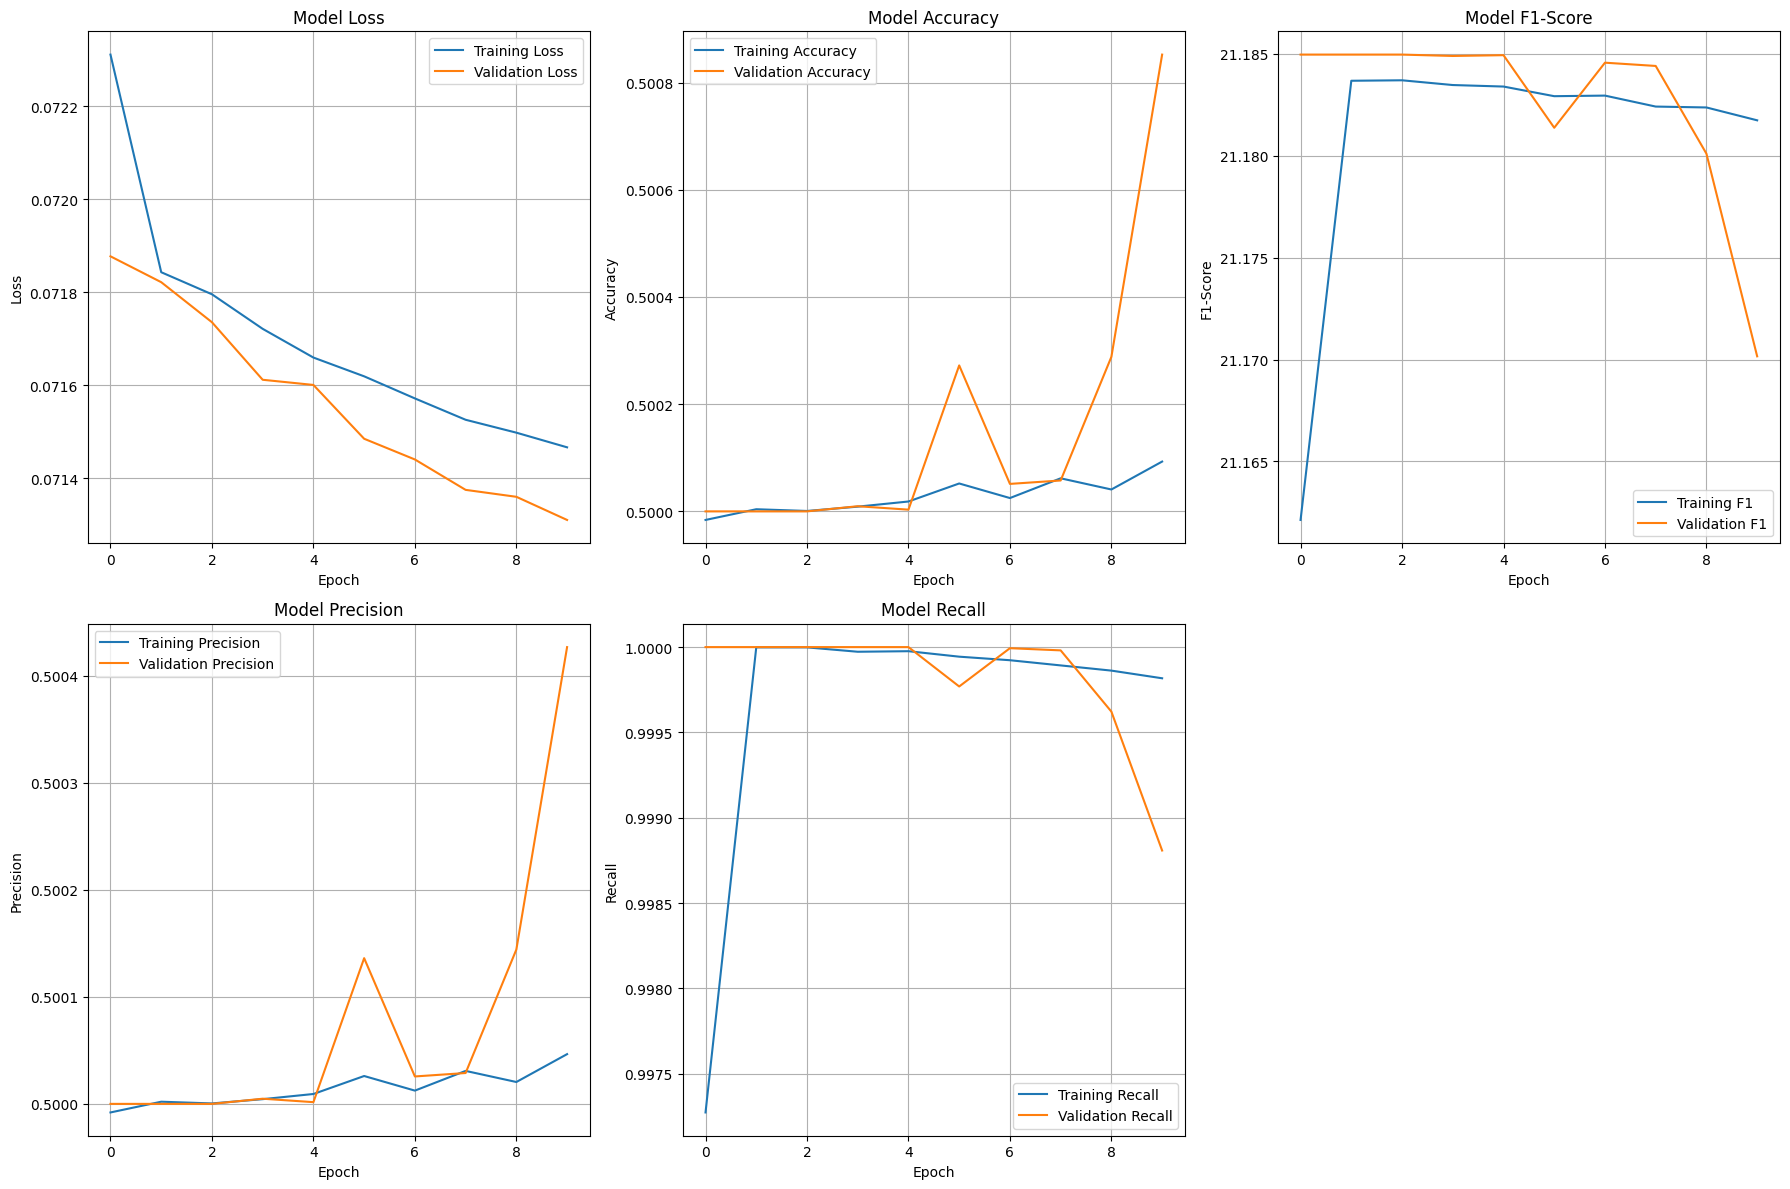


Step 6: Making predictions on test set...
7813/7813 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt


# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# ========================================
# STEP 1: PREPARE DATA WITH SMOTE
# ========================================
def prepare_data_with_smote(df, target_column='survival_status', apply_smote=True):
    feature_columns = [col for col in df.columns if col != target_column and col != 'record_id']
    X = df[feature_columns]
    y = df[target_column]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    if apply_smote:
        print("Applying SMOTE for class balancing...")
        smote = SMOTE(random_state=42, k_neighbors=3)
        X_scaled, y = smote.fit_resample(X_scaled, y)
        print(f"After SMOTE - Features shape: {X_scaled.shape}")
        print(f"After SMOTE - Target distribution:\n{pd.Series(y).value_counts()}")

    return X_scaled, y, scaler, feature_columns



# ========================================
# STEP 2: FOCAL LOSS AND F1 METRIC
# ========================================

def focal_loss(alpha=0.75, gamma=2.0):
    """
    Focal loss function to handle class imbalance
    """
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        
        # Calculate focal loss
        alpha_t = y_true * alpha + (1 - y_true) * (1 - alpha)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        focal_loss = -alpha_t * tf.math.pow((1 - p_t), gamma) * tf.math.log(p_t)
        
        return tf.reduce_mean(focal_loss)
    
    return focal_loss_fixed

def f1_metric(y_true, y_pred):
    """
    Custom F1-score metric for Keras (compatible with TensorFlow backend)
    """
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    def recall_m(y_true, y_pred):
        TP = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        Positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
        recall = TP / (Positives + tf.keras.backend.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        TP = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
        precision = TP / (Pred_Positives + tf.keras.backend.epsilon())
        return precision

    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

# ========================================
# STEP 3: IMPROVED NEURAL NETWORK
# ========================================

def create_improved_neural_network(input_dim, use_focal_loss=True):
    """
    Create improved neural network architecture optimized for F1-score
    """
    model = models.Sequential([
        # Input layer - slightly reduced to prevent overfitting
        layers.Dense(256, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        # Hidden layers with gradual reduction
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.1),
        
        # Output layer
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Custom optimizer with learning rate scheduling
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999
    )
    
    # Choose loss function
    if use_focal_loss:
        loss_function = focal_loss(alpha=0.75, gamma=2.0)
        print("Using Focal Loss for class imbalance")
    else:
        loss_function = 'binary_crossentropy'
        print("Using Binary Crossentropy")
    
    # Compile model with F1-score metric
    model.compile(
        optimizer=optimizer,
        loss=loss_function,
        metrics=['accuracy', 'precision', 'recall', f1_metric]
    )
    
    return model

# ========================================
# STEP 4: ENHANCED TRAINING FUNCTION
# ========================================

def train_improved_model(X_train, y_train, X_val, y_val, class_weight, use_focal_loss=True):
    """
    Train the improved neural network with F1-score optimization
    """
    y_train = np.array(y_train)
    y_val = np.array(y_val)
    
    # Create improved model
    model = create_improved_neural_network(X_train.shape[1], use_focal_loss)
    
    # Print model summary
    print("\nImproved Model Architecture:")
    model.summary()
    
    # Enhanced callbacks - monitor F1 score
    early_stopping = EarlyStopping(
        monitor='val_f1_metric',
        patience=20,
        restore_best_weights=True,
        verbose=1,
        mode='max'  # Maximize F1 score
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_f1_metric',
        factor=0.5,
        patience=10,
        min_lr=1e-7,
        verbose=1,
        mode='max'
    )
    
    # Train model with increased epochs
    print("\nStarting improved training...")
    history = model.fit(
        X_train, y_train,
        epochs=10,  # Increased epochs with early stopping
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        class_weight=class_weight,
        verbose=1
    )
    
    return model, history

# ========================================
# STEP 5: ENHANCED EVALUATION
# ========================================

def evaluate_and_optimize_f1(model, X_test, y_test):
    """
    Evaluate model and find optimal threshold for F1-score
    """
    # Get prediction probabilities
    y_pred_proba = model.predict(X_test).flatten()
    
    # Find optimal threshold for F1 score
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    
    # Handle NaN values
    f1_scores = np.nan_to_num(f1_scores)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
    
    # Make predictions with different thresholds
    y_pred_default = (y_pred_proba >= 0.5).astype(int)
    y_pred_optimized = (y_pred_proba >= optimal_threshold).astype(int)
    
    # Calculate F1 scores
    f1_default = f1_score(y_test, y_pred_default)
    f1_optimized = f1_score(y_test, y_pred_optimized)
    
    print(f"\n{'='*60}")
    print("ENHANCED EVALUATION RESULTS")
    print(f"{'='*60}")
    print(f"Default F1 Score (threshold=0.5): {f1_default:.4f}")
    print(f"Optimized F1 Score (threshold={optimal_threshold:.4f}): {f1_optimized:.4f}")
    print(f"F1 Score Improvement: {f1_optimized - f1_default:.4f}")
    print(f"Maximum F1 Score from PR curve: {np.max(f1_scores):.4f}")
    
    # Detailed classification report
    print(f"\nClassification Report (Optimized Threshold):")
    print(classification_report(y_test, y_pred_optimized))
    
    return optimal_threshold

# ========================================
# STEP 6: ENHANCED PLOTTING
# ========================================

def plot_enhanced_training_history(history):
    """
    Plot enhanced training history including F1-score
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Loss
    axes[0, 0].plot(history.history['loss'], label='Training Loss')
    axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0, 0].set_title('Model Loss')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    # Accuracy
    axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0, 1].set_title('Model Accuracy')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # F1 Score
    axes[0, 2].plot(history.history['f1_metric'], label='Training F1')
    axes[0, 2].plot(history.history['val_f1_metric'], label='Validation F1')
    axes[0, 2].set_title('Model F1-Score')
    axes[0, 2].set_xlabel('Epoch')
    axes[0, 2].set_ylabel('F1-Score')
    axes[0, 2].legend()
    axes[0, 2].grid(True)
    
    # Precision
    axes[1, 0].plot(history.history['precision'], label='Training Precision')
    axes[1, 0].plot(history.history['val_precision'], label='Validation Precision')
    axes[1, 0].set_title('Model Precision')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    # Recall
    axes[1, 1].plot(history.history['recall'], label='Training Recall')
    axes[1, 1].plot(history.history['val_recall'], label='Validation Recall')
    axes[1, 1].set_title('Model Recall')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    
    # Learning Rate
    if 'lr' in history.history:
        axes[1, 2].plot(history.history['lr'], label='Learning Rate')
        axes[1, 2].set_title('Learning Rate')
        axes[1, 2].set_xlabel('Epoch')
        axes[1, 2].set_ylabel('Learning Rate')
        axes[1, 2].set_yscale('log')
        axes[1, 2].legend()
        axes[1, 2].grid(True)
    else:
        axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.show()

# ========================================
# STEP 7: PREDICTION FUNCTION (MODIFIED)
# ========================================
def predict_test_set(model, test_df, scaler, optimal_threshold, feature_columns, id_column='record_id'):
    test_ids = test_df[id_column].copy()
    X_test = test_df[feature_columns]  # Only use same features used in training
    X_test_scaled = scaler.transform(X_test)

    test_pred_proba = model.predict(X_test_scaled).flatten()
    predictions_optimized = (test_pred_proba >= optimal_threshold).astype(int)

    submission = pd.DataFrame({
        id_column: test_ids,
        'survival_status': predictions_optimized
    })

    return submission


# ========================================
# STEP 8: MAIN EXECUTION FUNCTION (MODIFIED)
# ========================================
def main_optimized_pipeline(train_df, test_df=None, apply_smote=True, use_focal_loss=True):
    target_column = 'survival_status'
    id_column = 'record_id'

    print(f"{'='*60}")
    print("OPTIMIZED NEURAL NETWORK TRAINING PIPELINE")
    print(f"{'='*60}")

    # Step 1: Prepare data
    print("\nStep 1: Preparing data with SMOTE...")
    #X, y, scaler = prepare_data_with_smote(train_df, target_column, apply_smote)
    X, y, scaler, feature_columns = prepare_data_with_smote(train_df, target_column, apply_smote)

    # Step 2: Split
    print("\nStep 2: Splitting data...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Step 3: Compute class weights
    classes = np.unique(y_train)
    class_weights_array = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
    class_weight = dict(zip(classes, class_weights_array))
    print(f"Enhanced class weights: {class_weight}")

    # Step 4: Train model
    print("\nStep 3: Training optimized neural network...")
    model, history = train_improved_model(
        X_train, y_train, X_test, y_test, class_weight, use_focal_loss
    )

    # Step 5: Evaluate
    print("\nStep 4: Evaluating model with F1-score optimization...")
    optimal_threshold = evaluate_and_optimize_f1(model, X_test, y_test)

    # Step 6: Plot
    print("\nStep 5: Plotting enhanced training history...")
    plot_enhanced_training_history(history)

    
    # Step 7: Predict
    if test_df is not None:
        print("\nStep 6: Making predictions on test set...")
        submission = predict_test_set(model, test_df, scaler, optimal_threshold, feature_columns, id_column)
        #submission = predict_test_set(model, test_df, scaler, optimal_threshold, id_column)
        return model, scaler, optimal_threshold, submission, history

    return model, scaler, optimal_threshold, history
model, scaler, optimal_threshold, submission, history = main_optimized_pipeline(
    df, test,
    apply_smote=True,
    use_focal_loss=True
)


NEURAL NETWORK TRAINING PIPELINE (DEFAULT THRESHOLD)

Step 1: Preparing data with SMOTE...
Applying SMOTE for class balancing...
After SMOTE - Features shape: (1560790, 15)
After SMOTE - Target distribution:
survival_status
0    780395
1    780395
Name: count, dtype: int64

Step 2: Splitting data...
Class weights: {0: 1.0, 1: 1.0}

Step 3: Training neural network...
Using Focal Loss for class imbalance

Improved Model Architecture:


C:\Users\lchat\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,153 (192.00 KB)

 Trainable params: 48,257 (188.50 KB)

 Non-trainable params: 896 (3.50 KB)


Starting improved training...
39020/39020 ━━━━━━━━━━━━━━━━━━━━ 362s 9ms/step - accuracy: 0.4990 - f1_metric: 21.0541 - loss: 0.0741 - precision: 0.4990 - recall: 0.9874 - val_accuracy: 0.5000 - val_f1_metric: 21.1850 - val_loss: 0.0719 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 1.

Step 4: Evaluating model with default threshold...
9755/9755 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step

EVALUATION RESULTS (DEFAULT THRESHOLD)
F1 Score (threshold=0.5): 0.6667

Classification Report:


C:\Users\lchat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lchat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lchat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    156079
           1       0.50      1.00      0.67    156079

    accuracy                           0.50    312158
   macro avg       0.25      0.50      0.33    312158
weighted avg       0.25      0.50      0.33    312158


Step 5: Plotting training history...


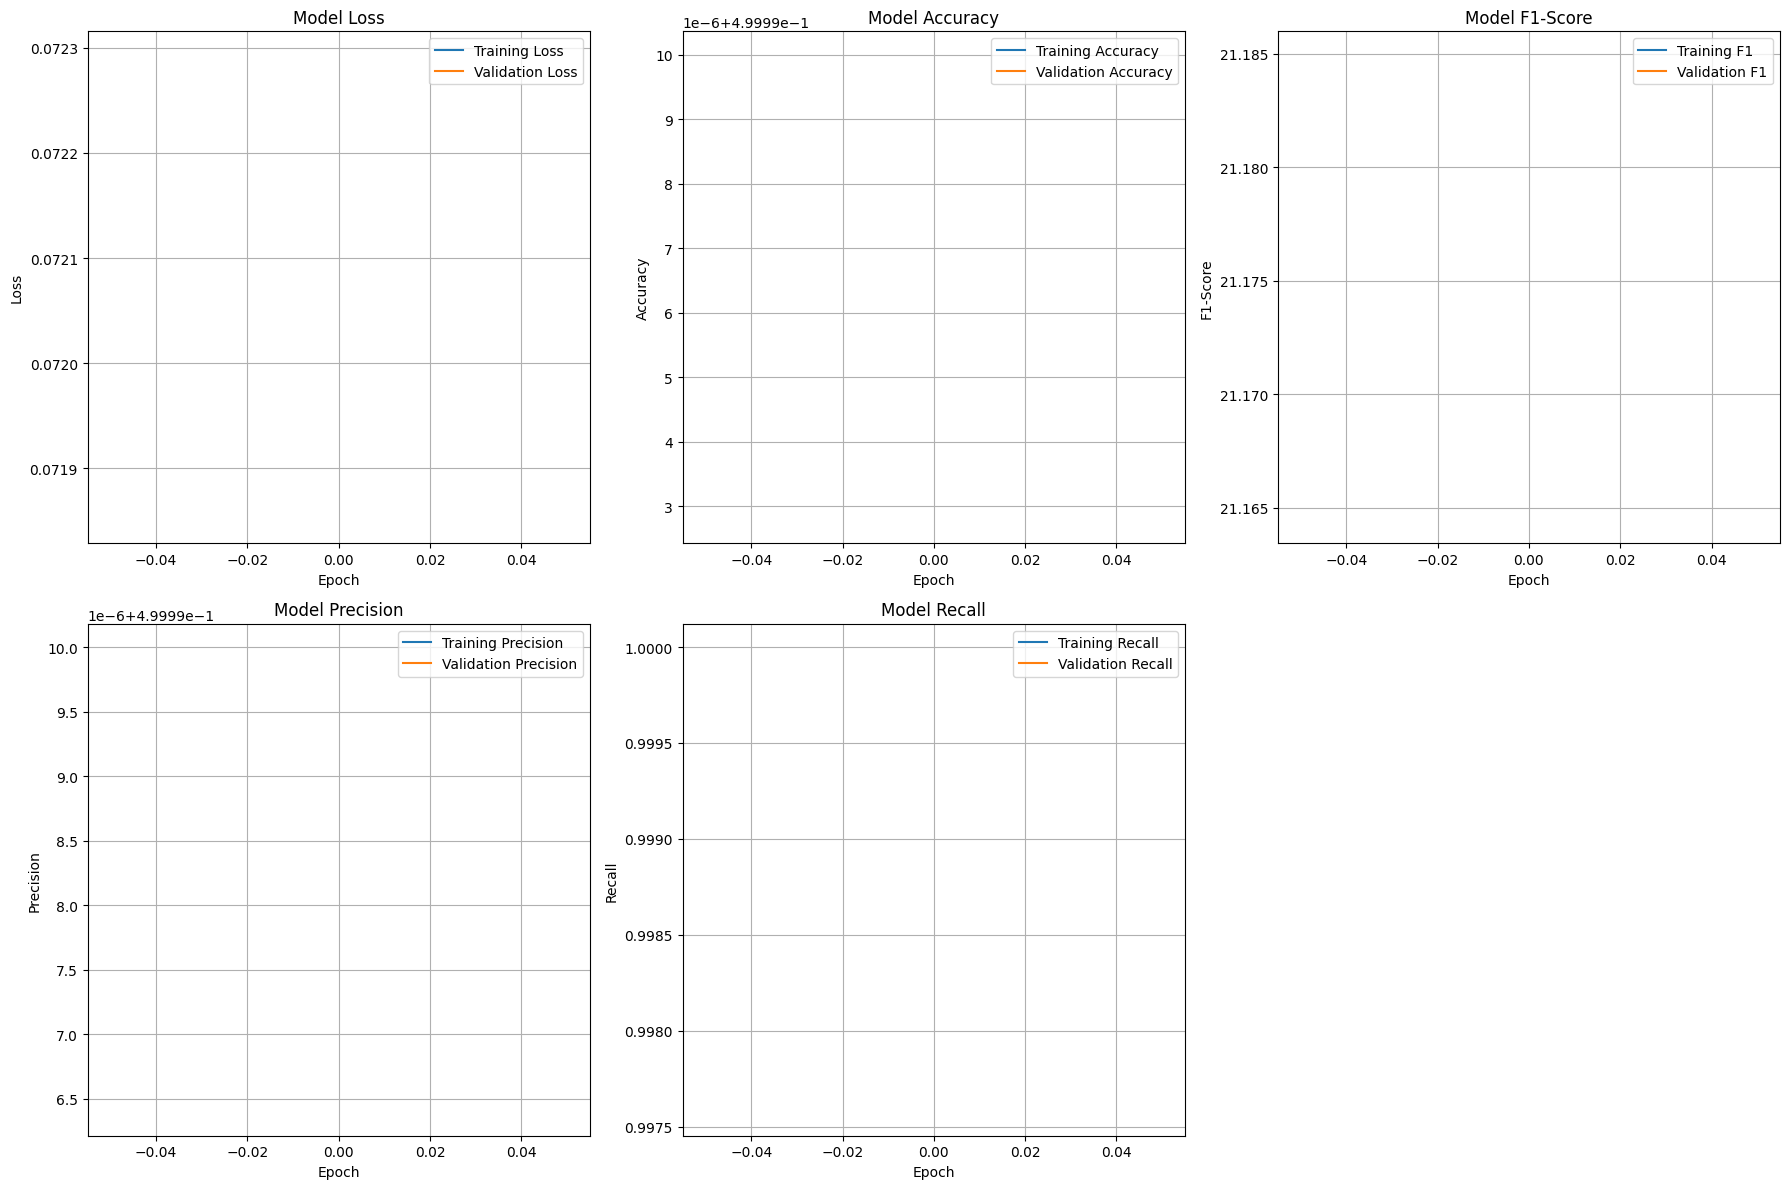


Step 6: Making predictions on test set...
7813/7813 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt


# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# ========================================
# STEP 1: PREPARE DATA WITH SMOTE
# ========================================
def prepare_data_with_smote(df, target_column='survival_status', apply_smote=True):
    feature_columns = [col for col in df.columns if col != target_column and col != 'record_id']
    X = df[feature_columns]
    y = df[target_column]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    if apply_smote:
        print("Applying SMOTE for class balancing...")
        smote = SMOTE(random_state=42, k_neighbors=3)
        X_scaled, y = smote.fit_resample(X_scaled, y)
        print(f"After SMOTE - Features shape: {X_scaled.shape}")
        print(f"After SMOTE - Target distribution:\n{pd.Series(y).value_counts()}")

    return X_scaled, y, scaler, feature_columns


# ========================================
# STEP 2: FOCAL LOSS AND F1 METRIC
# ========================================

def focal_loss(alpha=0.75, gamma=2.0):
    """
    Focal loss function to handle class imbalance
    """
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        
        # Calculate focal loss
        alpha_t = y_true * alpha + (1 - y_true) * (1 - alpha)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        focal_loss = -alpha_t * tf.math.pow((1 - p_t), gamma) * tf.math.log(p_t)
        
        return tf.reduce_mean(focal_loss)
    
    return focal_loss_fixed

def f1_metric(y_true, y_pred):
    """
    Custom F1-score metric for Keras (compatible with TensorFlow backend)
    """
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    def recall_m(y_true, y_pred):
        TP = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        Positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
        recall = TP / (Positives + tf.keras.backend.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        TP = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
        precision = TP / (Pred_Positives + tf.keras.backend.epsilon())
        return precision

    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

# ========================================
# STEP 3: IMPROVED NEURAL NETWORK
# ========================================

def create_improved_neural_network(input_dim, use_focal_loss=True):
    """
    Create improved neural network architecture optimized for F1-score
    """
    model = models.Sequential([
        # Input layer - slightly reduced to prevent overfitting
        layers.Dense(256, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        # Hidden layers with gradual reduction
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.1),
        
        # Output layer
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Custom optimizer with learning rate scheduling
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999
    )
    
    # Choose loss function
    if use_focal_loss:
        loss_function = focal_loss(alpha=0.75, gamma=2.0)
        print("Using Focal Loss for class imbalance")
    else:
        loss_function = 'binary_crossentropy'
        print("Using Binary Crossentropy")
    
    # Compile model with F1-score metric
    model.compile(
        optimizer=optimizer,
        loss=loss_function,
        metrics=['accuracy', 'precision', 'recall', f1_metric]
    )
    
    return model

# ========================================
# STEP 4: ENHANCED TRAINING FUNCTION
# ========================================

def train_improved_model(X_train, y_train, X_val, y_val, class_weight, use_focal_loss=True):
    """
    Train the improved neural network with F1-score optimization
    """
    y_train = np.array(y_train)
    y_val = np.array(y_val)
    
    # Create improved model
    model = create_improved_neural_network(X_train.shape[1], use_focal_loss)
    
    # Print model summary
    print("\nImproved Model Architecture:")
    model.summary()
    
    # Enhanced callbacks - monitor F1 score
    early_stopping = EarlyStopping(
        monitor='val_f1_metric',
        patience=20,
        restore_best_weights=True,
        verbose=1,
        mode='max'  # Maximize F1 score
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_f1_metric',
        factor=0.5,
        patience=10,
        min_lr=1e-7,
        verbose=1,
        mode='max'
    )
    
    # Train model with increased epochs
    print("\nStarting improved training...")
    history = model.fit(
        X_train, y_train,
        epochs=1,  # Increased epochs with early stopping
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        class_weight=class_weight,
        verbose=1
    )
    
    return model, history

# ========================================
# STEP 5: SIMPLE EVALUATION (DEFAULT THRESHOLD)
# ========================================

def evaluate_with_default_threshold(model, X_test, y_test):
    """
    Evaluate model using default threshold (0.5)
    """
    # Get prediction probabilities
    y_pred_proba = model.predict(X_test).flatten()
    
    # Make predictions with default threshold (0.5)
    y_pred = (y_pred_proba >= 0.5).astype(int)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n{'='*60}")
    print("EVALUATION RESULTS (DEFAULT THRESHOLD)")
    print(f"{'='*60}")
    print(f"F1 Score (threshold=0.5): {f1:.4f}")
    
    # Detailed classification report
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return f1

# ========================================
# STEP 6: ENHANCED PLOTTING
# ========================================

def plot_enhanced_training_history(history):
    """
    Plot enhanced training history including F1-score
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Loss
    axes[0, 0].plot(history.history['loss'], label='Training Loss')
    axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0, 0].set_title('Model Loss')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    # Accuracy
    axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0, 1].set_title('Model Accuracy')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # F1 Score
    axes[0, 2].plot(history.history['f1_metric'], label='Training F1')
    axes[0, 2].plot(history.history['val_f1_metric'], label='Validation F1')
    axes[0, 2].set_title('Model F1-Score')
    axes[0, 2].set_xlabel('Epoch')
    axes[0, 2].set_ylabel('F1-Score')
    axes[0, 2].legend()
    axes[0, 2].grid(True)
    
    # Precision
    axes[1, 0].plot(history.history['precision'], label='Training Precision')
    axes[1, 0].plot(history.history['val_precision'], label='Validation Precision')
    axes[1, 0].set_title('Model Precision')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    # Recall
    axes[1, 1].plot(history.history['recall'], label='Training Recall')
    axes[1, 1].plot(history.history['val_recall'], label='Validation Recall')
    axes[1, 1].set_title('Model Recall')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    
    # Learning Rate
    if 'lr' in history.history:
        axes[1, 2].plot(history.history['lr'], label='Learning Rate')
        axes[1, 2].set_title('Learning Rate')
        axes[1, 2].set_xlabel('Epoch')
        axes[1, 2].set_ylabel('Learning Rate')
        axes[1, 2].set_yscale('log')
        axes[1, 2].legend()
        axes[1, 2].grid(True)
    else:
        axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.show()

# ========================================
# STEP 7: PREDICTION FUNCTION (DEFAULT THRESHOLD)
# ========================================
def predict_test_set(model, test_df, scaler, feature_columns, id_column='record_id'):
    test_ids = test_df[id_column].copy()
    X_test = test_df[feature_columns]  # Only use same features used in training
    X_test_scaled = scaler.transform(X_test)

    test_pred_proba = model.predict(X_test_scaled).flatten()
    predictions = (test_pred_proba >= 0.5).astype(int)  # Default threshold

    submission = pd.DataFrame({
        id_column: test_ids,
        'survival_status': predictions
    })

    return submission


# ========================================
# STEP 8: MAIN EXECUTION FUNCTION (DEFAULT THRESHOLD)
# ========================================
def main_default_threshold_pipeline(train_df, test_df=None, apply_smote=True, use_focal_loss=True):
    target_column = 'survival_status'
    id_column = 'record_id'

    print(f"{'='*60}")
    print("NEURAL NETWORK TRAINING PIPELINE (DEFAULT THRESHOLD)")
    print(f"{'='*60}")

    # Step 1: Prepare data
    print("\nStep 1: Preparing data with SMOTE...")
    X, y, scaler, feature_columns = prepare_data_with_smote(train_df, target_column, apply_smote)

    # Step 2: Split
    print("\nStep 2: Splitting data...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Step 3: Compute class weights
    classes = np.unique(y_train)
    class_weights_array = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
    class_weight = dict(zip(classes, class_weights_array))
    print(f"Class weights: {class_weight}")

    # Step 4: Train model
    print("\nStep 3: Training neural network...")
    model, history = train_improved_model(
        X_train, y_train, X_test, y_test, class_weight, use_focal_loss
    )

    # Step 5: Evaluate with default threshold
    print("\nStep 4: Evaluating model with default threshold...")
    f1 = evaluate_with_default_threshold(model, X_test, y_test)

    # Step 6: Plot
    print("\nStep 5: Plotting training history...")
    plot_enhanced_training_history(history)

    # Step 7: Predict
    if test_df is not None:
        print("\nStep 6: Making predictions on test set...")
        submission = predict_test_set(model, test_df, scaler, feature_columns, id_column)
        return model, scaler, submission, history

    return model, scaler, history

# Execute the pipeline
model, scaler, submission, history = main_default_threshold_pipeline(
    df, test,
    apply_smote=True,
    use_focal_loss=True
)

In [80]:

# Save the predictions
submission.to_csv(r"C:\Users\lchat\submissionNeuralNet_NOT_OPT.csv", index=False)

model.save('cancer_survival_model_optimized_second.h5')

print("✅ Submission and model saved successfully.")


✅ Submission and model saved successfully.
